In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from tqdm.notebook import tqdm
import models
import matplotlib.pyplot as plt

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyperparameters
batch_size = 64

# Fashion MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.FashionMNIST(root='mnist_data/', train=True, transform=transform, download=True)
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_dataset = datasets.FashionMNIST(root='mnist_data/', train=False, transform=transform, download=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=True)

In [2]:
#main model
cnn = models.CNN()
cnn.load_state_dict(torch.load('models/fashion/cnn.pth'))
cnn.eval()

#autoencoder
latent_dims = 10
vae = models.VAE(latent_dims)
vae.load_state_dict(torch.load('models/fashion/vae.pth'))
vae.eval()

VAE(
  (encoder): Sequential(
    (0): Conv2d(1, 32, kernel_size=(4, 4), stride=(1, 1), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): Conv2d(32, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  )
  (mu): Linear(in_features=3136, out_features=10, bias=True)
  (logvar): Linear(in_features=3136, out_features=10, bias=True)
  (upsample): Linear(in_features=10, out_features=3136, bias=True)
  (decoder): Sequential(
    (0): ConvTranspose2d(64, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): ConvTranspose2d(32, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): ConvTranspose2d(32, 1, kernel_size=(4, 4), stride=(1, 1), padding=(2, 2))
  )
)

In [3]:
examples = enumerate(train_loader)
batch_idx, (example_data, _) = next(examples)

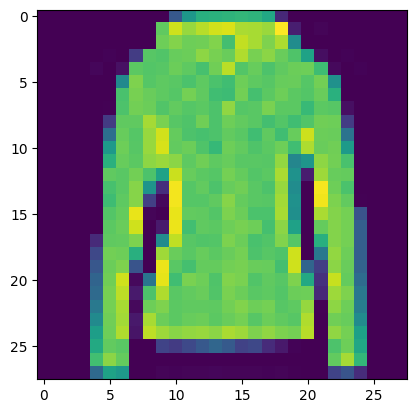

In [4]:
factual = example_data[0].reshape(-1,1,28,28).detach()

plt.imshow(factual.view(28,28))
plt.show()

In [9]:
vae.encode(factual)

tensor([[-4.4333,  0.7778,  4.9965, -0.7553, -1.2912, -6.4086,  4.6576,  1.9430,
          3.9775,  2.6000]], grad_fn=<AddmmBackward0>)

In [ ]:
example_data.shape